# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.


## Start Analysis

In [73]:
# Load data
df = pd.read_csv("data/beach_sensors.csv")

In [75]:
# Dataset shape (rows × columns)
# display(df.shape)

# Perform needed transformation since from the note, we know this 
# dataset is time-series data with continuous sensor readings.
df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
# Date range (start date and end date) - REQUIRED if temporal data
# display(df['Measurement Timestamp'].min())


# Put all following info in one
# - Column names (one per line or comma-separated)
# - Data types for each column
# - Missing value counts for each column (column name: count)
# missing not by random since theres columns with exact same number of missing
column_info = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.astype(str).values,
    'Missing': df.isnull().sum().values,
    'Missing %': ((df.isnull().sum().values/df.shape[0])*100).round(1)
})
# display(column_info)

# Write to file
with open("output/q1_data_info.txt", "w") as f:
    f.write(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

    f.write(f"\nColumn Names:\n")
    for i in column_info['Column']:
        f.write(f"- {i}\n")

    f.write(f"\nData Types:\n")
    for i in range(column_info.shape[0]):
        f.write(f"- {column_info['Column'][i]}: {column_info['Type'][i]}\n")

    f.write(f"\nDate Range:\n")
    f.write(f"Start: {df['Measurement Timestamp'].min()}\n")
    f.write(f"End: {df['Measurement Timestamp'].max()}\n")

    f.write(f"\nMissing Values:\n")
    for i in range(column_info.shape[0]):
        f.write(f"- {column_info['Column'][i]}: {column_info['Missing'][i]} ({column_info['Missing %'][i]:.1f}%)\n")


## Q1 Artifacts 2

In [71]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
stat_df = df[numeric_cols].describe().T.reset_index()
stat_df = stat_df.round(1)
stat_df = stat_df.rename(columns={'index': 'column_name'})
stat_df['missing_count'] = len(df) - stat_df['count']
reportq1_2 = stat_df[['column_name', 'mean', 'std', 'min', 'max', 'missing_count']]
reportq1_2.to_csv('output/q1_exploration.csv', index=False)
# display(reportq2)

## Q1 Artifact 3

Measurement Timestamp
2015-04-26     7.000000
2015-05-03     6.100000
2015-05-10          NaN
2015-05-17          NaN
2015-05-24    14.951429
Freq: W-SUN, Name: Air Temperature, dtype: float64

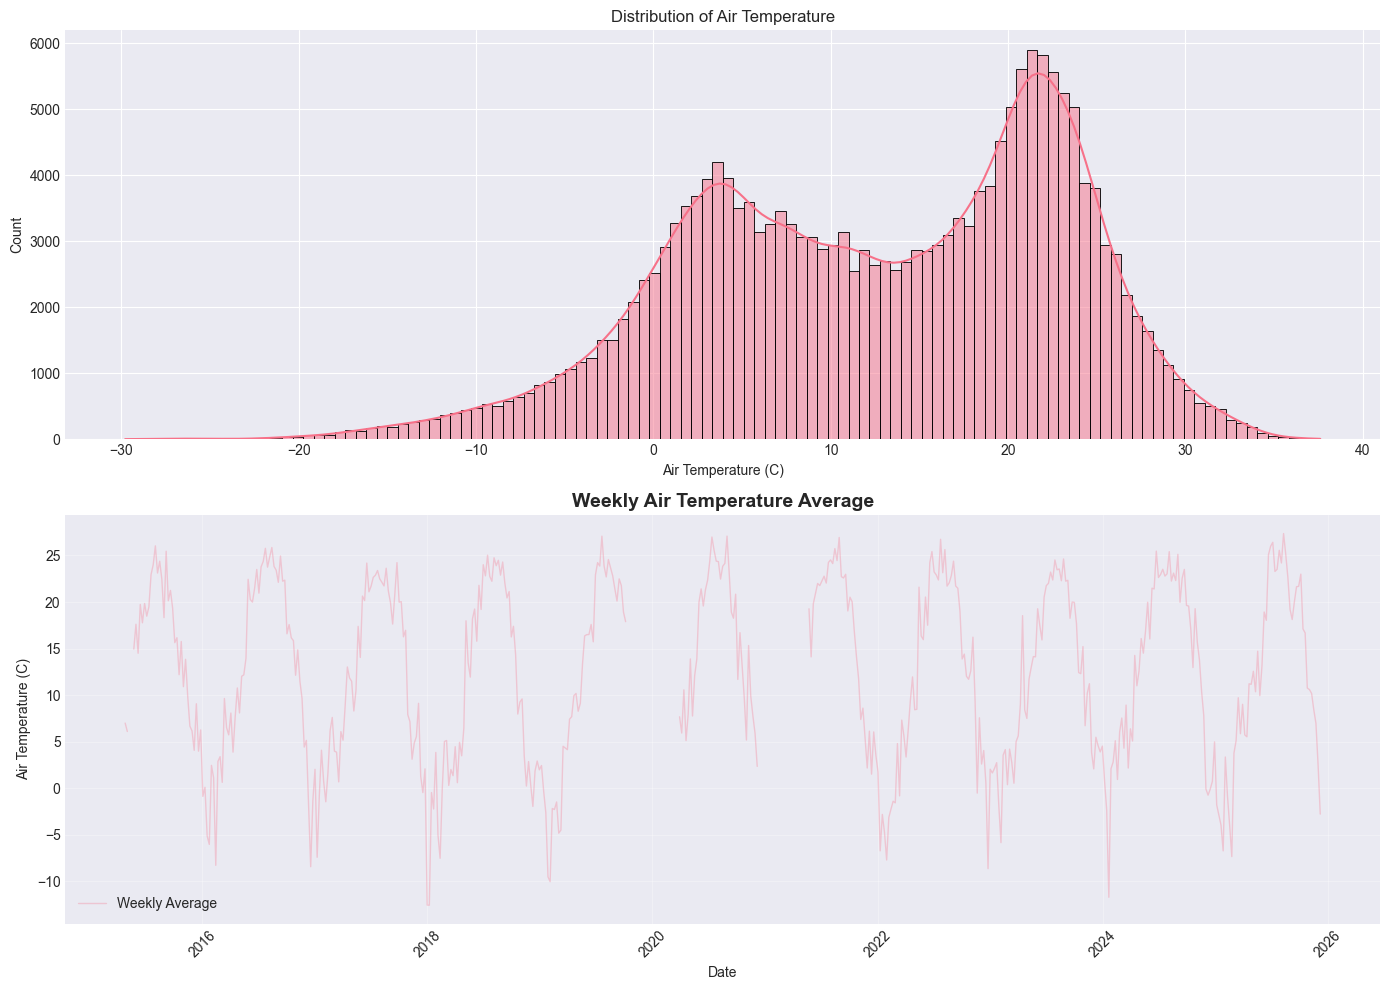

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Density plot for Air Temperature with histogram
sns.histplot(data=df, x='Air Temperature', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Air Temperature')
axes[0].set_xlabel('Air Temperature (C)')

# Time series: weekly average air temperature
ts = df.set_index('Measurement Timestamp')
weekly = ts['Air Temperature'].resample('W').mean()
display(weekly.head())
axes[1].plot(weekly.index, weekly, alpha=0.3, label='Weekly Average', linewidth=1)
axes[1].set_title('Weekly Air Temperature Average', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Air Temperature (C)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()

# correlation plt

# Save the plot
plt.savefig('output/q1_visualizations.png', dpi=150, bbox_inches='tight')
plt.show()
